# Predicting Microsoft Stock Prices using RNN


datasource- Yahoo Finance!

### Data Preprocessing

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing training set

In [2]:
df_overall = pd.read_csv('MSFT.csv')

In [3]:
df_train = df_overall[df_overall.Date < '2019-03-01']
df_test = df_overall[df_overall.Date >= '2019-03-01']

In [4]:
train_set = df_train.iloc[:,1:2].values

Feature scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_set = sc.fit_transform(train_set)

Creating a datastructure with 60 timesteps and 1 output

In [6]:
x_train = []
y_train = []
for i in range(60,len(train_set)):
    x_train.append(train_set[i-60:i,0])
    y_train.append(train_set[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Bulding RNN
Importing libraries

In [8]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout

Using TensorFlow backend.


Inititalising and the adding 4 LSTM layers

In [32]:
reg = Sequential()

In [33]:
reg.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

Adding the output layer

In [34]:
reg.add(Dense(units=1))

Compiling and the fitting RNN to the training set

In [35]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [41]:
reg.fit(x_train, y_train, epochs=200, batch_size=128)

Epoch 1/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.4408e-04
Epoch 2/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.3115e-04
Epoch 3/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.4284e-04
Epoch 4/200
4760/4760 [==============================] - 13s 3ms/step - loss: 4.0444e-04
Epoch 5/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.6512e-04
Epoch 6/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.3426e-04
Epoch 7/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.3076e-04
Epoch 8/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.4037e-04
Epoch 9/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.5021e-04
Epoch 10/200
4760/4760 [==============================] - 14s 3ms/step - loss: 3.3184e-04
Epoch 11/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.6460e-04
Epoch 12/200
4760/4

4760/4760 [==============================] - 13s 3ms/step - loss: 3.2400e-04
Epoch 92/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.4952e-04
Epoch 93/200
4760/4760 [==============================] - 14s 3ms/step - loss: 3.4110e-04
Epoch 94/200
4760/4760 [==============================] - 15s 3ms/step - loss: 3.3080e-04
Epoch 95/200
4760/4760 [==============================] - 13s 3ms/step - loss: 4.0877e-04
Epoch 96/200
4760/4760 [==============================] - 15s 3ms/step - loss: 3.2917e-04
Epoch 97/200
4760/4760 [==============================] - 16s 3ms/step - loss: 3.7308e-04
Epoch 98/200
4760/4760 [==============================] - 16s 3ms/step - loss: 3.2430e-04
Epoch 99/200
4760/4760 [==============================] - 15s 3ms/step - loss: 3.4335e-04
Epoch 100/200
4760/4760 [==============================] - 14s 3ms/step - loss: 2.9710e-04
Epoch 101/200
4760/4760 [==============================] - 15s 3ms/step - loss: 3.4226e-04
Epoch 102/200
4760/47

4760/4760 [==============================] - 19s 4ms/step - loss: 3.2656e-04
Epoch 182/200
4760/4760 [==============================] - 19s 4ms/step - loss: 3.2196e-04
Epoch 183/200
4760/4760 [==============================] - 20s 4ms/step - loss: 3.5736e-04
Epoch 184/200
4760/4760 [==============================] - 18s 4ms/step - loss: 3.1417e-04
Epoch 185/200
4760/4760 [==============================] - 20s 4ms/step - loss: 3.2781e-04
Epoch 186/200
4760/4760 [==============================] - 19s 4ms/step - loss: 3.0224e-04
Epoch 187/200
4760/4760 [==============================] - 21s 4ms/step - loss: 3.3273e-04
Epoch 188/200
4760/4760 [==============================] - 19s 4ms/step - loss: 3.0705e-04
Epoch 189/200
4760/4760 [==============================] - 16s 3ms/step - loss: 3.2651e-04
Epoch 190/200
4760/4760 [==============================] - 13s 3ms/step - loss: 3.4006e-04
Epoch 191/200
4760/4760 [==============================] - 14s 3ms/step - loss: 3.1805e-04
Epoch 192/200

### Making Predictions and visualising the results
Getting real stock price

In [42]:
real_price = df_test.iloc[:,1:2].values

Getting the predicted stock prices

In [43]:
df_total = pd.concat((df_train.Open, df_test.Open), axis = 0)
inputs = df_total[len(df_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,100):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price = reg.predict(x_test)
pred_price = sc.inverse_transform(pred_price)

Visualising the results

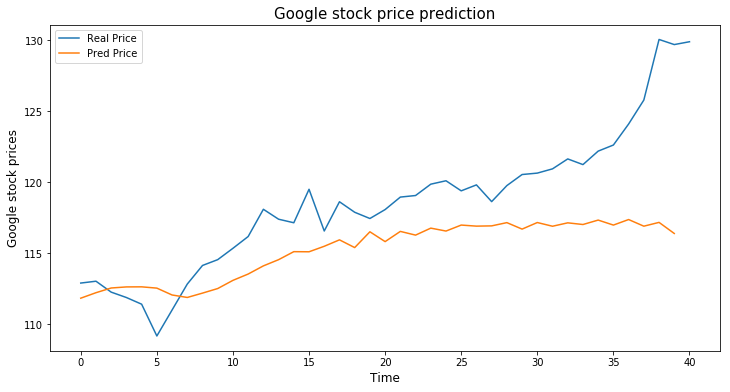

In [44]:
plt.figure(figsize=(12,6))
plt.plot(real_price, label = 'Real Price')
plt.plot(pred_price, label = 'Pred Price')
plt.xlabel('Time', size=12)
plt.ylabel('Google stock prices', size=12)
plt.title('Google stock price prediction',size=15)
plt.legend()